In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
from scipy.integrate import nquad

# Exercise 10.10

## the code

In [3]:
def MH_normal_continuous(f, sigma2, y0, N=int(1e5)):

    def Bernoulli(p): # Draw from Bernoulli(p)
        return np.random.rand() <= p # rand() is uniform on [0,1]

    sigma = np.sqrt(sigma2)

    t = 0 # Initialize t
    y = np.empty(N) # Initialize y

    y[0]= y0 # Start at our initial location

    while t < N-1:
        #draw the proposal
        proposal = np.random.normal(loc=y[t], scale=sigma)
        #calculate the acceptance probability
        acceptance_prob = min(f(proposal) * norm.pdf(y[t], loc=proposal, scale=sigma) /
                              (f(y[t]) * norm.pdf(proposal, loc=y[t], scale=sigma)), 1)
        #now decide if to accept or reject.
        if Bernoulli(acceptance_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]

        t += 1

    return y

## part 1

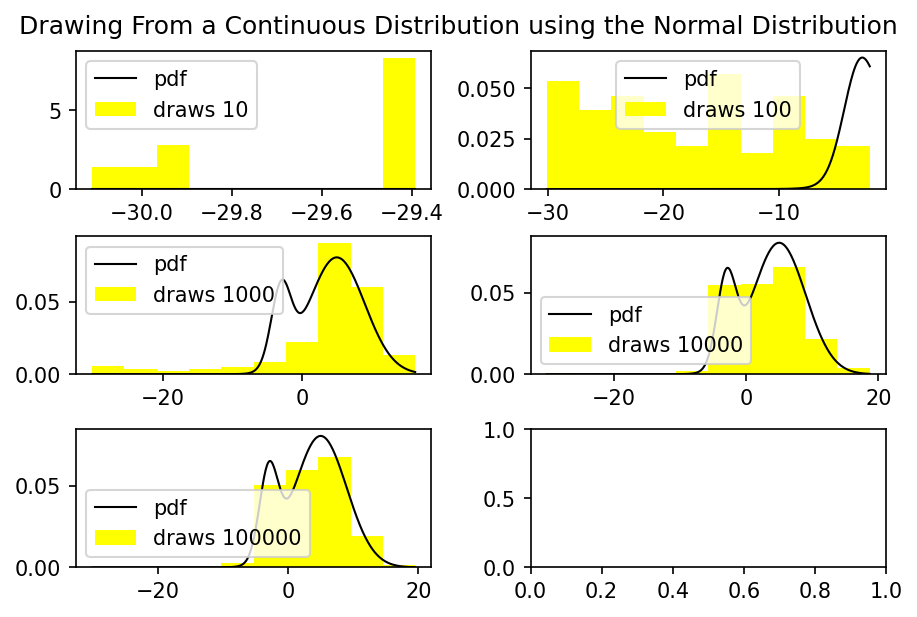

In [5]:
def problem10_10_1():
    #define needed variables
    f = lambda s: 4*np.exp(-(s+3)**2/4) + 6*np.exp(-(s-5)**2/ 32)
    samples = MH_normal_continuous(f, 1, -30)

    #get integrating factor
    Z, _ = quad(f, -np.inf, np.inf)
    #create p.d.f.
    f_pdf = lambda x: f(x) / Z
    k_vals = 10**np.arange(1, 6)
    fig, axs = plt.subplots(3, 2, constrained_layout=True)
    fig.set_dpi(150)

   #now we plot
    k_ind = 0
    for i in range(3):
        for j in range(2):
            if i == 2 and j == 1:
                break
            else:
                ax = axs[i, j]
                k = k_vals[k_ind]
                curr_samples = samples[:k]
                x = np.linspace(np.min(curr_samples), np.max(curr_samples), 500)
                ax.plot(x, f_pdf(x), 'k-', linewidth=1, label='pdf')
                ax.hist(curr_samples, density=True, color='yellow', label='draws ' + str(k))
                ax.legend(loc='best')
                k_ind += 1

    plt.suptitle('Drawing From a Continuous Distribution using the Normal Distribution')
    plt.show()
    return

problem10_10_1()

## part 2

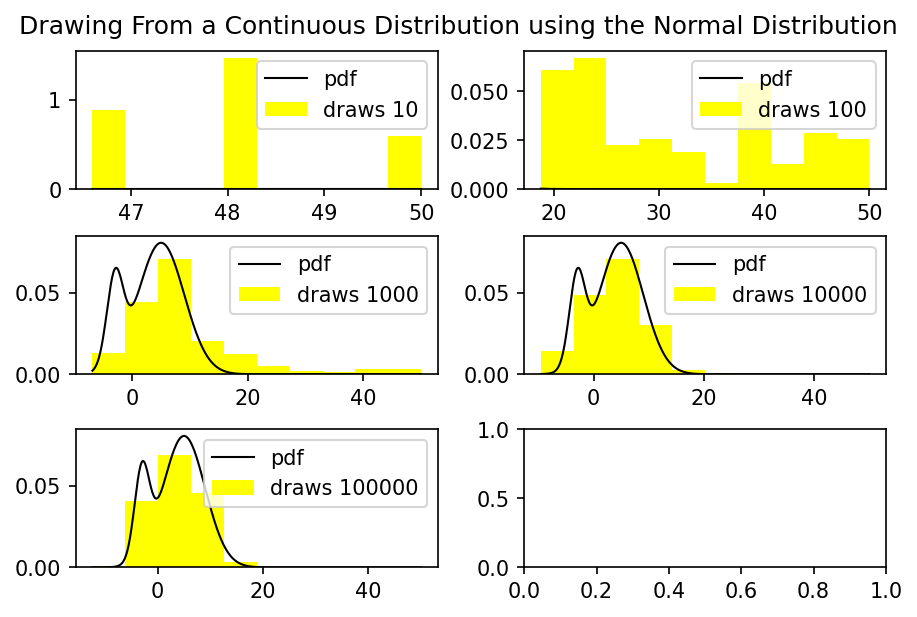

In [9]:
def problem10_10_2():
    #define needed variables
    f = lambda s: 4*np.exp(-(s+3)**2/4) + 6*np.exp(-(s-5)**2/ 32)
    samples = MH_normal_continuous(f, 1, 50)

    #get integrating factor
    Z, _ = quad(f, -np.inf, np.inf)
    #create p.d.f.
    f_pdf = lambda x: f(x) / Z
    k_vals = 10**np.arange(1, 6)
    fig, axs = plt.subplots(3, 2, constrained_layout=True)
    fig.set_dpi(150)

    #now we plot
    k_ind = 0
    for i in range(3):
        for j in range(2):
            if i == 2 and j == 1:
                break
            else:
                ax = axs[i, j]
                k = k_vals[k_ind]
                curr_samples = samples[:k]
                x = np.linspace(np.min(curr_samples), np.max(curr_samples), 500)
                ax.plot(x, f_pdf(x), 'k-', linewidth=1, label='pdf')
                ax.hist(curr_samples, density=True, color='yellow', label='draws ' + str(k))
                ax.legend(loc='best')
                k_ind += 1

    plt.suptitle('Drawing From a Continuous Distribution using the Normal Distribution')
    plt.show()
    return

problem10_10_2()

In each case when we look at the histogram by the 1000 draw the normed histogram looks somewhat like the distribution.
If 1000 draws is enough for us to start sampling from the distribution at the extreme values of $[-30, 50]$ then it should be good enough for anything inbetween.
Therefore a good burn in value is $B = 1000$.

# Exercise 10.11

## adjusting the code:

In [16]:
def MH_normal_continuous_burn(f, sigma2, y0, B = int(1e5), N=int(1e5)):

    def Bernoulli(p): # Draw from Bernoulli(p)
        return np.random.rand() <= p # rand() is uniform on [0,1]

    sigma = np.sqrt(sigma2)

    t = 0 # Initialize t
    y = np.empty(B+N) # Initialize y

    y[0]= y0 # Start at our initial location

    while t < B+N-1:
        #draw the proposal
        proposal = np.random.normal(loc=y[t], scale=sigma)
        #calculate the acceptance probability
        acceptance_prob = min(f(proposal) /  f(y[t]) , 1)
        #now decide if to accept or reject.
        if Bernoulli(acceptance_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]

        t += 1

    return y[B:]

def MH_uniform_continuous_burn(f, L, y0, B = int(1e5), N=int(1e5)):

    def Bernoulli(p): # Draw from Bernoulli(p)
        return np.random.rand() <= p # rand() is uniform on [0,1]

    t = 0 # Initialize t
    y = np.empty(N+B) # Initialize y

    y[0]= y0 # Start at our initial location

    while t < B+N-1:
        #draw the proposal
        proposal = np.random.uniform(low=y[t]-L, high=y[t] + L)
        #calculate the acceptance probability
        acceptance_prob = min( f(proposal)  / f(y[t]) , 1)
        #now decide if to accept or reject.
        if Bernoulli(acceptance_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]

        t += 1

    return y[B:]

## Parts 1 and 2

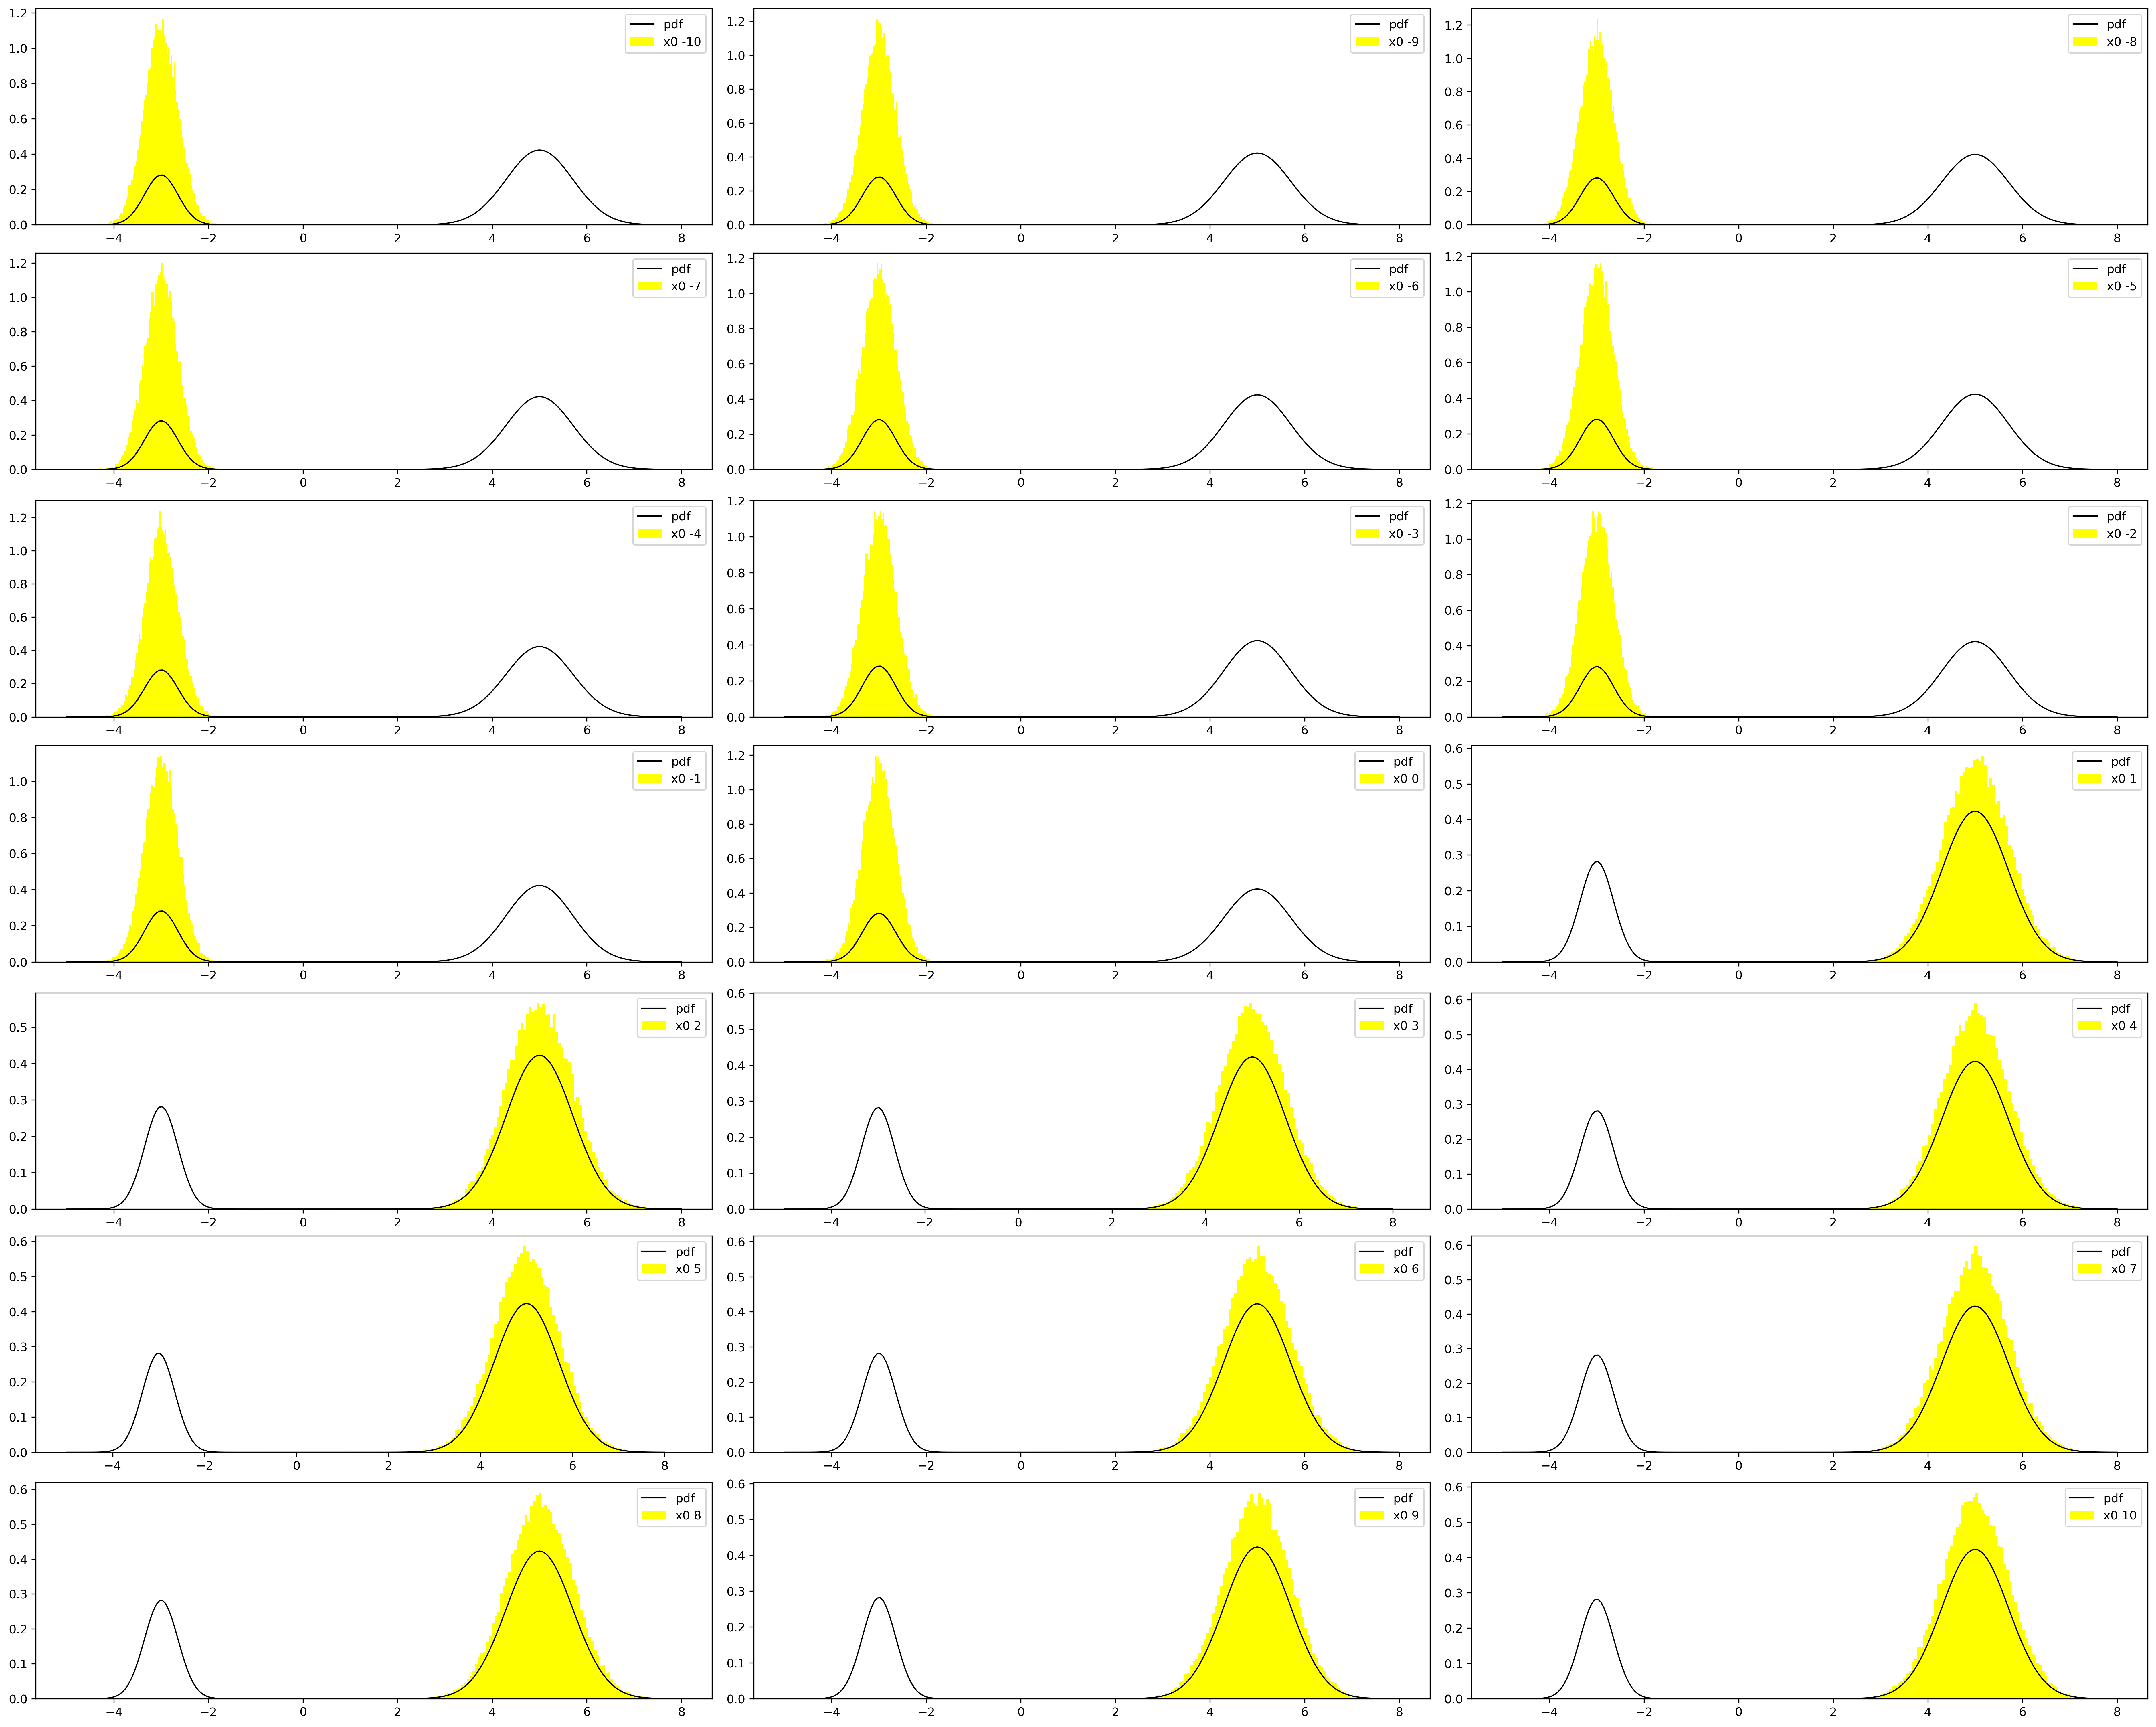

In [33]:
def problem10_11_1_2():
    f = lambda s: 4*np.exp(-(s+3)**2/0.25) + 6*np.exp(-(s-5)**2)
    Z, _ = quad(f, -np.inf, np.inf)
    #create p.d.f.
    f_pdf = lambda x: f(x) / Z

    x0 = np.arange(-10, 11)

    fig, axs = plt.subplots(7, 3, constrained_layout=True, figsize=(25, 20))
    fig.set_dpi(300)
    x_ind = 0

    for i in range(7):
        for j in range(3):
            ax = axs[i, j]
            x = x0[x_ind]
            curr_samples = MH_normal_continuous_burn(f, 1, x)
            y = np.linspace(-5, 8, 200)
            ax.plot(y, f_pdf(y), 'k-', linewidth=1, label='pdf')
            ax.hist(curr_samples, density=True, color='yellow', label='x0 ' + str(x), bins=99)
            ax.legend(loc='best')
            x_ind += 1

    plt.show()
    return

problem10_11_1_2()

## Part 3

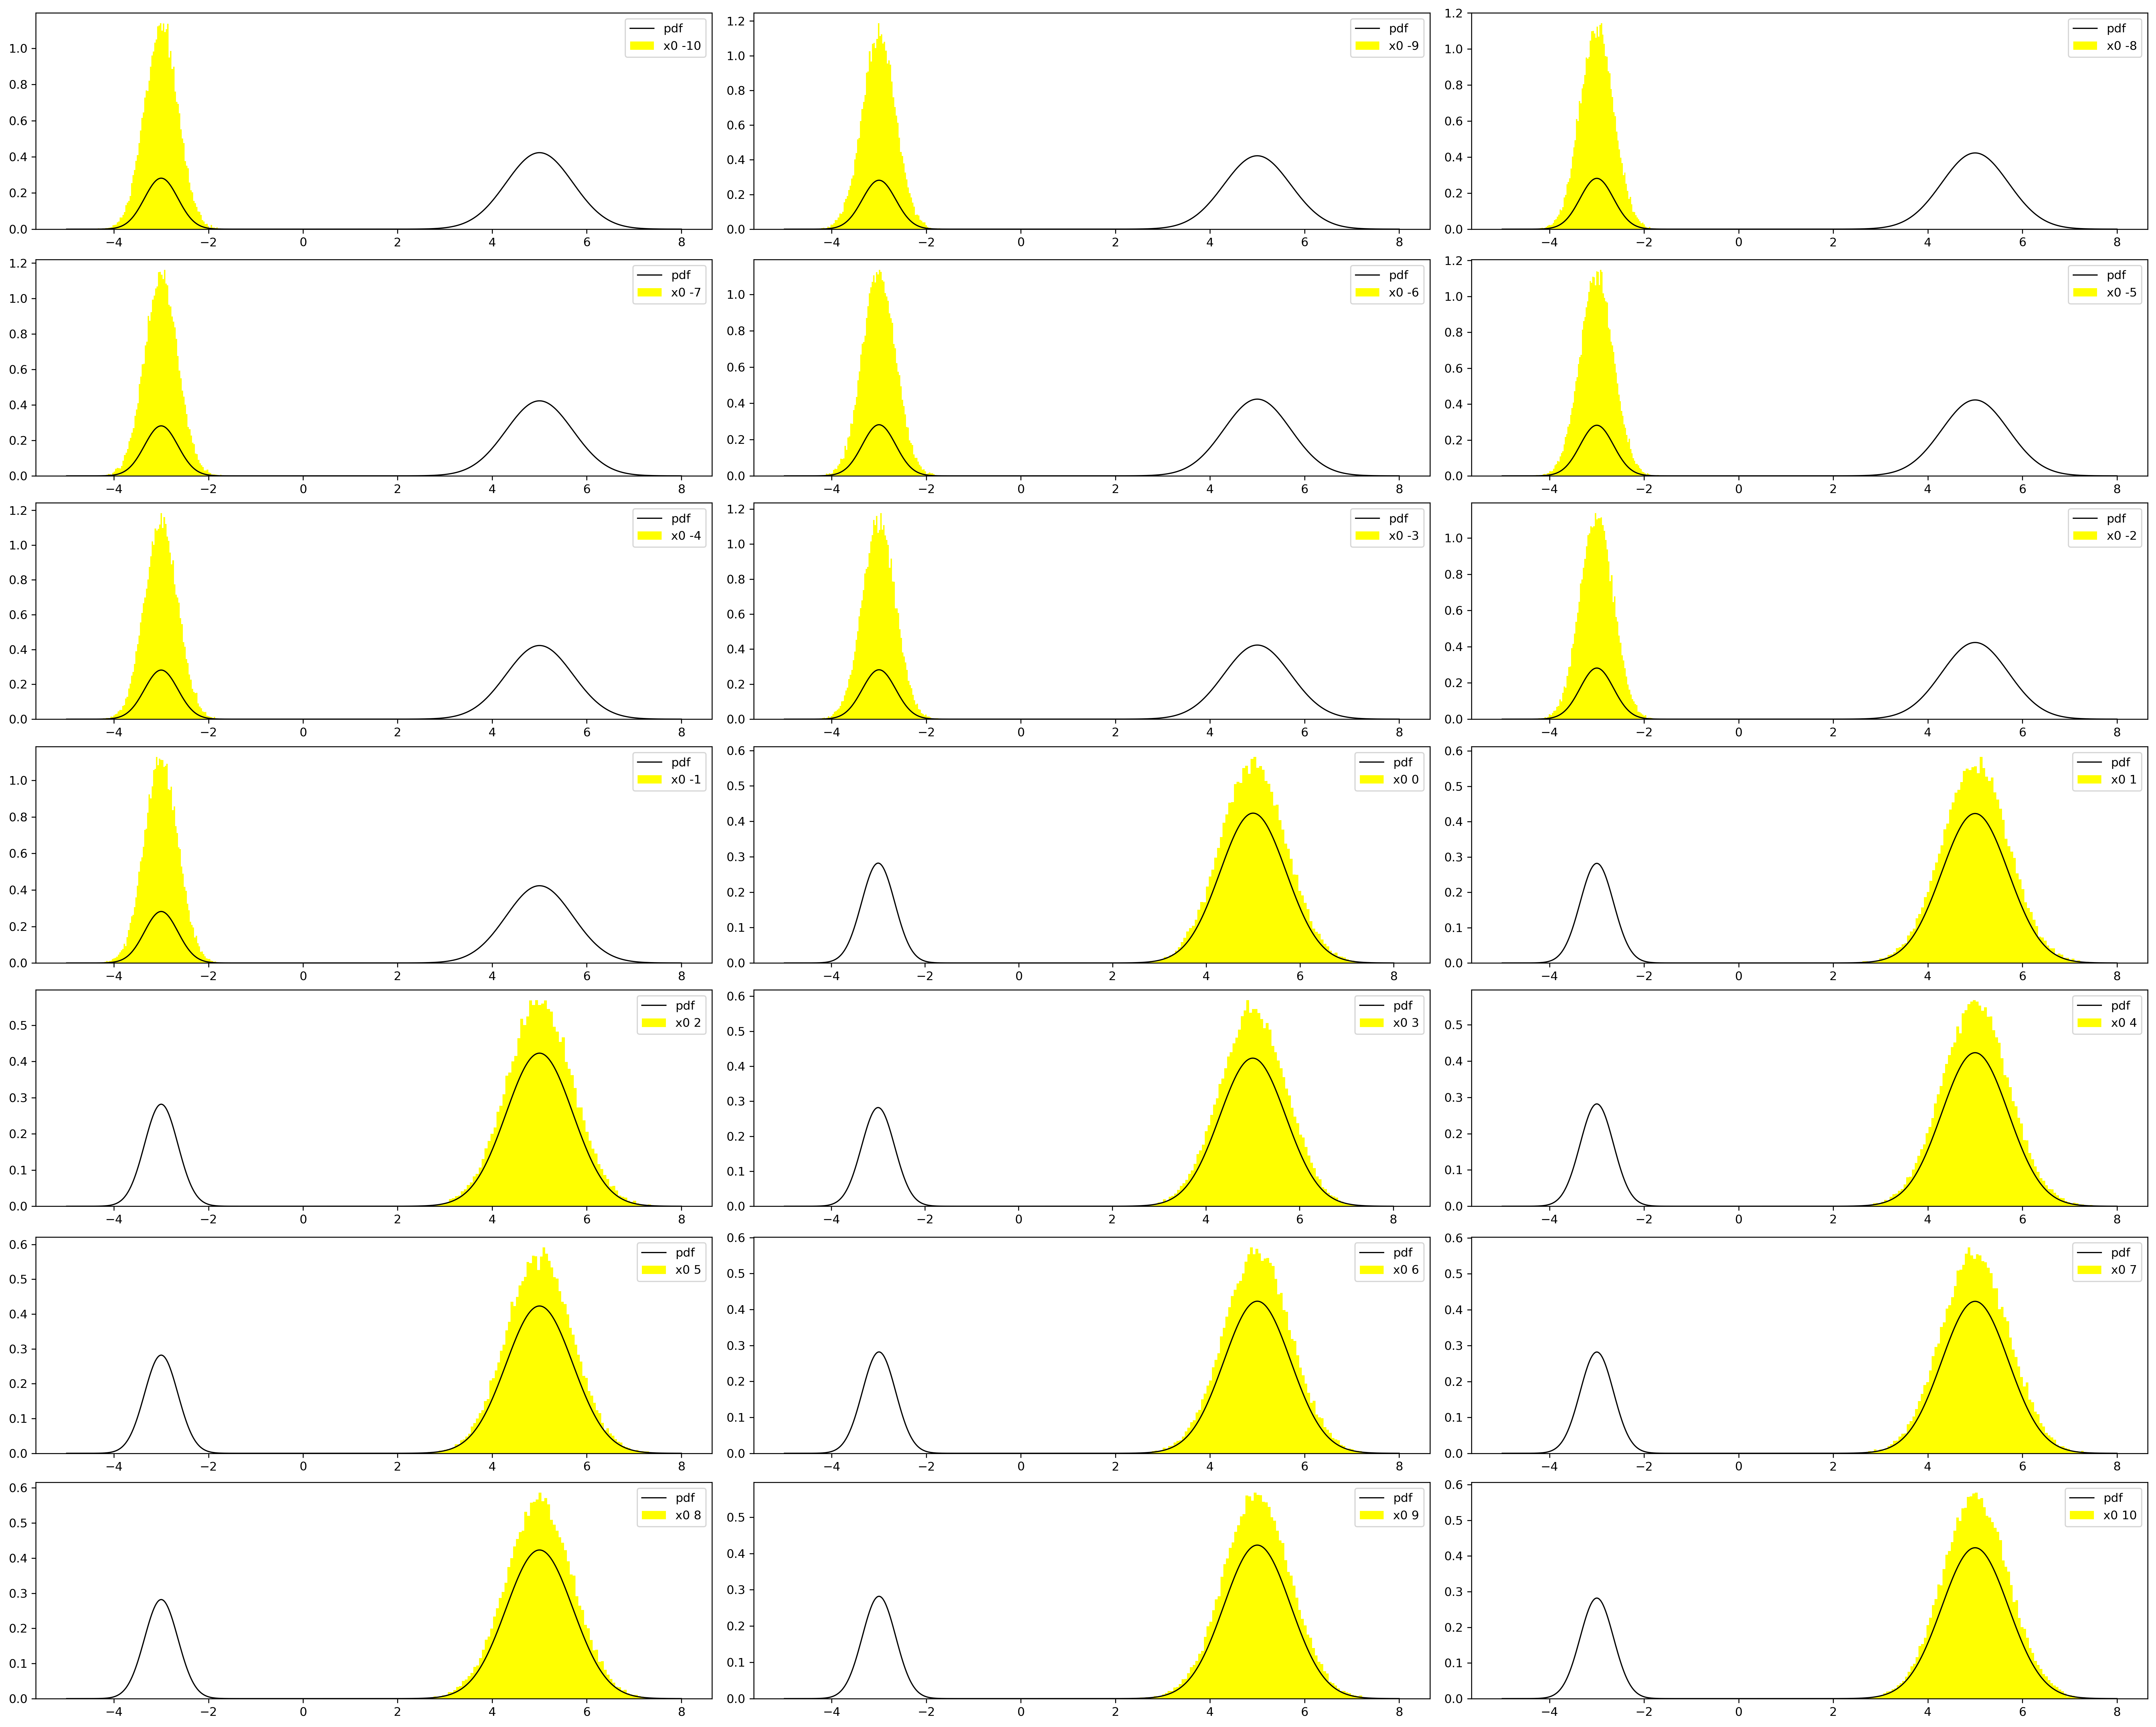

In [34]:
def problem10_11_3():
    f = lambda s: 4*np.exp(-(s+3)**2/0.25) + 6*np.exp(-(s-5)**2)
    Z, _ = quad(f, -np.inf, np.inf)
    #create p.d.f.
    f_pdf = lambda x: f(x) / Z

    x0 = np.arange(-10, 11)

    fig, axs = plt.subplots(7, 3, constrained_layout=True, figsize=(25, 20))
    fig.set_dpi(300)
    x_ind = 0

    for i in range(7):
        for j in range(3):
            ax = axs[i, j]
            x = x0[x_ind]
            curr_samples = MH_uniform_continuous_burn(f, 1, x)
            y = np.linspace(-5,8, 500)
            ax.plot(y, f_pdf(y), 'k-', linewidth=1, label='pdf')
            ax.hist(curr_samples, density=True, color='yellow', label='x0 ' + str(x), bins=99)
            ax.legend(loc='best')
            x_ind += 1

    plt.show()
    return

problem10_11_3()

# Exercise 10.12

We show that using the Gibb's Markov chain, for any proposal $s'$ the acceptance probability is always $a_{s's} =1$.

\begin{align}
a_{s's} &= \min\left(\frac{\pi_{s'} q_{ss'}}{\pi_s q_{s's}}, 1\right) = \min\left( \frac{ P(s') P(s |s') }{  P(s' | s) P(s)} , 1\right)
\end{align}

We show that $\frac{\pi_{s'} q_{ss'}}{\pi_s q_{s's}} = 1$.

\begin{align}
\frac{ P(s') P(s |s') }{  P(s' | s) P(s)} &= \frac{ P(s')  }{  P(s' | s) P(s)} \frac{P(s' | s) P(s)}{P(s')}\\
&=1
\end{align}

Where the penultimate equality follows from using Bayes' Theorem on  $P(s|s')$.

Therefore $a_{s' s} = \min(1, 1) = 1$.

# Exercise 10.13


## Part 1

We show that $f_{X, Y}(x, y) \propto g(y) e^{-(1 + y^2)(x - \frac{4}{1 + y^2})^2/2}$

Let $g(y) = \exp(4y - y^2/2 + 8/(1 + y^2))$. Then notice that
\begin{align}
g(y)\exp(-(1 + y^2)(x - \frac{4}{1 + y^2})^2/2) &= \exp((-x^2y^2 + x^2 + y^2 -8x - 8y)/2)
\end{align}

Therefore

\begin{align}
f_{X, Y}(x, y) \propto g(y) e^{-(1 + y^2)(x - \frac{4}{1 + y^2})^2/2}
\end{align}

Thus $f_{X|Y}(x| y)$ is normal with mean $4/(1 + y^2)$ and variance $1/(1+y^2)$.
Similarly for $f_{Y|X}(y|x)$

## parts 2-4

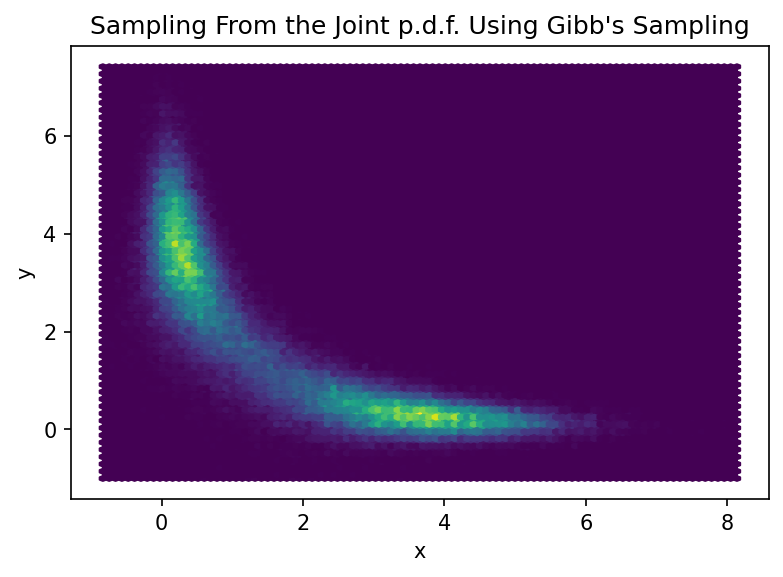

mean: [1.85894564 1.8670404 ]
variance:
 [[ 2.78409759 -2.34769556]
 [-2.34769556  2.80339818]]


In [6]:
def gibbs(x0, y0, N=int(1e5)):

    #initialize draw
    sample = np.empty((N, 2))
    #set initial
    sample[0, 0] = x0
    sample[0, 1] = y0
    t = 0
    while t < N-1:
        #get a random coordinate
        coord = np.random.randint(low=0, high=2)
        #if the coordinate is 0 (corresponds to x)
        #draw from f_{X|Y}
        if coord == 0:
            x = np.random.normal(loc=4/(1 +sample[t, 1]**2), scale=np.sqrt(1/(1+sample[t, 1]**2)))
            sample[t+1, 1] = sample[t, 1]
            sample[t+1, 0] = x
        # if the coordinate is 1 (corresponds to y)
        #draw from f_{Y|X}
        else:
            y = np.random.normal(loc=4/(1 +sample[t, 0]**2), scale=np.sqrt(1/(1+sample[t, 0]**2)))
            sample[t+1, 0] = sample[t, 0]
            sample[t+1, 1] = y

        t+=1

    return sample

def problem10_13():
    joint_prop = lambda x,y : np.exp(-(x**2 * y**2 +x**2 + y**2 -8*x-8*y)/2)
    Z, _ = nquad(joint_prop, [[-np.inf, np.inf], [-np.inf, np.inf]])
    joint_pdf = lambda x, y: joint_prop(x, y) / Z

    sample = gibbs(0, 0)

    mean = np.mean(sample, axis=0)
    var = np.cov([sample[:, 0], sample[:, 1]])

    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.hexbin(sample[:,0], sample[:, 1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title("Sampling From the Joint p.d.f. Using Gibb's Sampling")
    plt.show()

    return mean, var

mean, var = problem10_13()
print('mean:', mean)
print('variance:\n', var)